In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
# chemine vers le fichier
filename = "https://raw.githubusercontent.com/JosueAfouda/Prix-Voiture/master/imports-85.data"
# Lecture du fichier
df = pd.read_csv(filename, header=None)


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Nome les colonnes
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style", 
         "drive-wheels","engine-location","wheel_base", "length","width","height","curb-weight","engine-type", 
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", 
         "peak-rpm","city-mpg","highway-mpg","price"] 
df = pd.read_csv(filename, header=None, names= headers)

df.head()

         

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel_base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
#structure de la dataFrem
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
# remplacons "?" par NAN
df.replace("?",np.nan, inplace=True)
# evalution des nombres des colonnes manquantes 
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel_base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
#Imputation par la moyenne des colonnes normalized-losses, bore, stroke, horsepower et peak-rpm
def imput_avg(X):
    avg =X.astype('float').mean(axis=0)
    return X.replace(np.nan, avg, inplace= True)

for colonne in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']:
    imput_avg(df[colonne])

In [10]:
#Imputation par le mode de la variable num-of-doors 
mode = df['num-of-doors'].value_counts().idxmax
df['num-of-doors'].replace(np.nan, mode)

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object

In [13]:
#Suppression des lignes de df où il y a des données manquantes
df.dropna(subset=['price'],axis=0, inplace = True)

In [14]:
#Réinitialisation des indices 
df.reset_index(drop=True, inplace=True)

In [15]:
#Nombre de valeurs manquantes dans df
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel_base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [16]:
# Format des données
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [17]:
#conversion
df[['bore', 'stroke', 'peak-rpm','price']]=df[['bore', 'stroke', 'peak-rpm','price']].astype('float')

In [18]:
df[['normalized-losses', 'horsepower']]=df[['normalized-losses', 'horsepower']].astype('int')

In [19]:
#Vérification de la conversion 
df.dtypes 

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [20]:
##  SAUVEGARDE DES DONNEES NETTOYEES 
df.to_csv('df_prix_voiture_clean.csv')

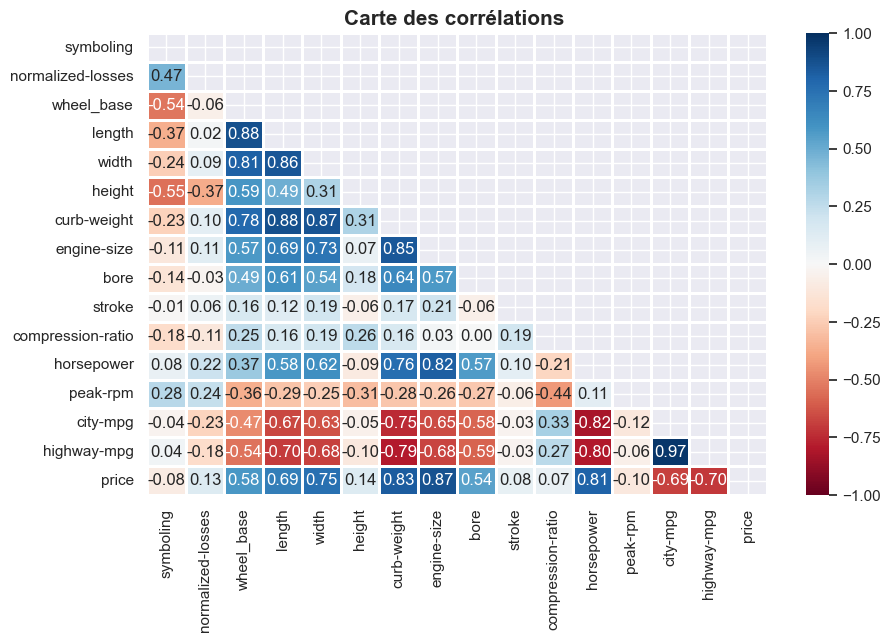

In [37]:
## ANALYSE EXPLORATOIRE DES DONNEES 
        # Carte des corrélations 
sns.set(rc={'figure.figsize':(10,6)})

# 1. Extraire uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# 2. Calcul de la matrice de corrélation
corr_matrix = df_numeric.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, center=0, cmap='RdBu',linewidths=1, annot=True, fmt=".2f",vmin=-1, vmax=1)
plt.title('Carte des corrélations ', fontsize=15, fontweight="bold")
plt.show()
    

In [38]:
#Définition d'une fonction slrViz_corr 

def slrViz_corr(var):
    sns.regplot(x = var , y=df['price'])
    plt.ylim(0,)
    pearson_coef, P_value = stats.pearsonr(var, df['price'])
    return print('Le coefficient de corrélation de Pearson est', pearson_coef, 'avec une P-valeur de', P_value)

Le coefficient de corrélation de Pearson est 0.5846418222655083 avec une P-valeur de 8.076488270732552e-20


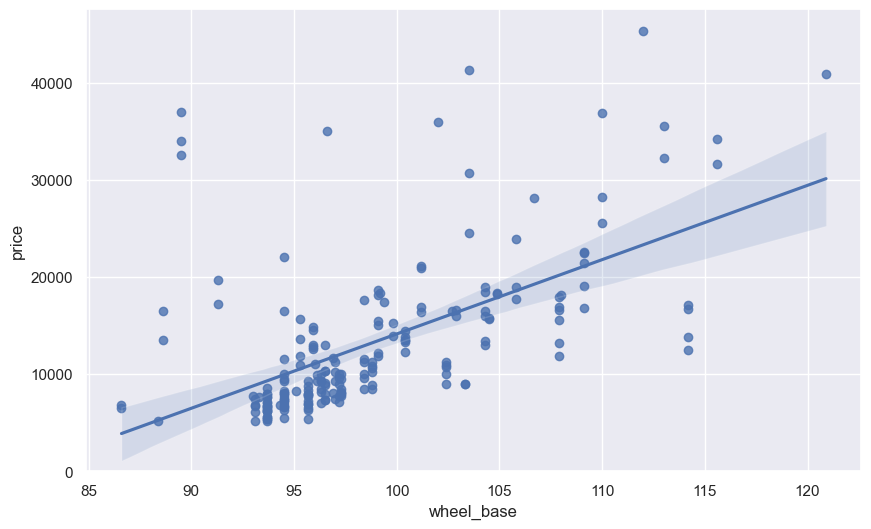

In [39]:
#Régression linéaire simple de 'price' en fonction de 'wheel-base' 
slrViz_corr(df['wheel_base'])

Le coefficient de corrélation de Pearson est 0.6906283804483646 avec une P-valeur de 8.016477466157795e-30


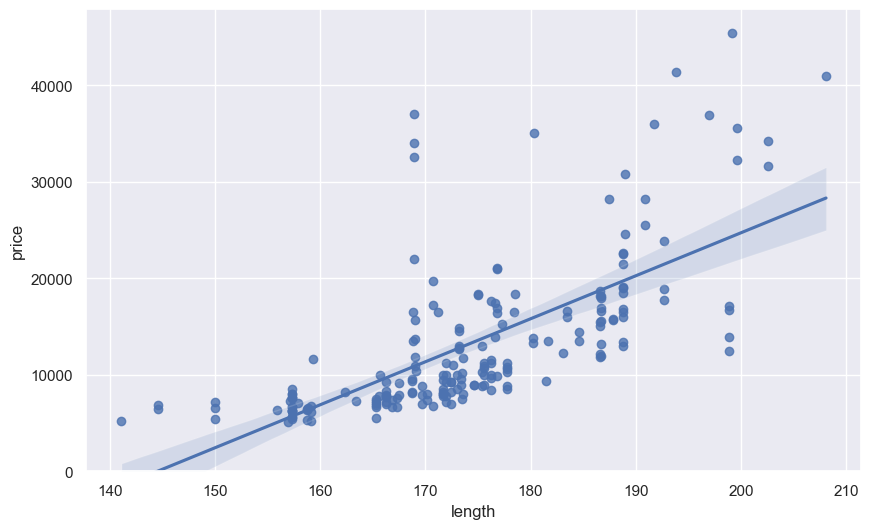

In [40]:
## length et price.
slrViz_corr(df['length'])


Le coefficient de corrélation de Pearson est 0.7512653440522679 avec une P-valeur de 9.200335510479991e-38


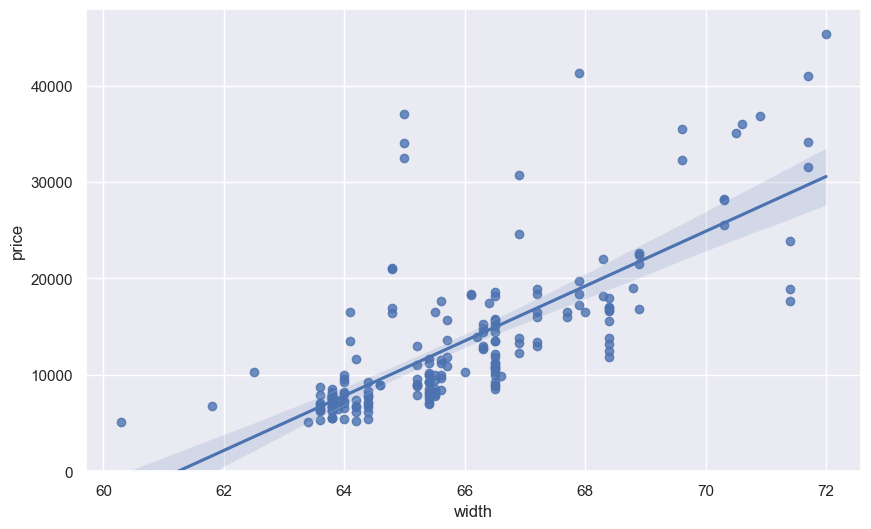

In [51]:
#Régression linéaire simple de 'price' en fonction de 'width' 
slrViz_corr(df['width']) 

Le coefficient de corrélation de Pearson est 0.8344145257702849 avec une P-valeur de 2.189577238893391e-53


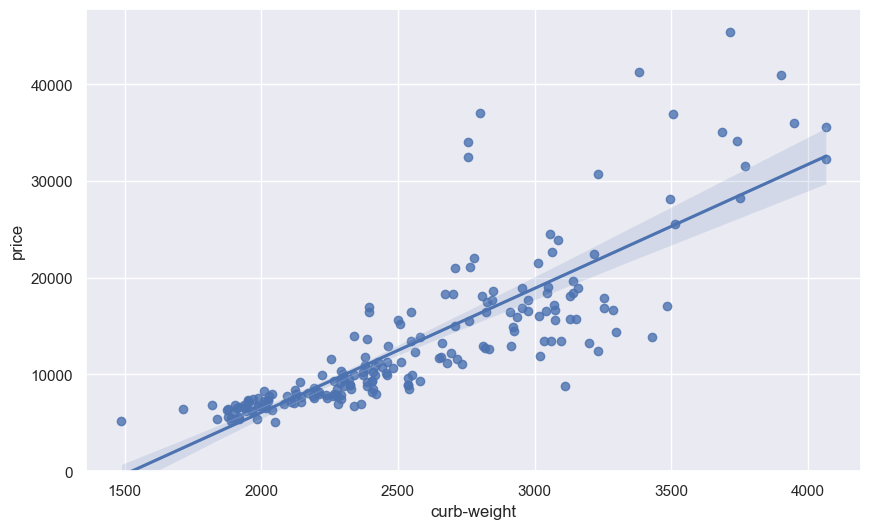

In [41]:
#Régression linéaire simple de 'price' en fonction de 'curb-weight' 
slrViz_corr(df['curb-weight'])

Le coefficient de corrélation de Pearson est 0.8723351674455185 avec une P-valeur de 9.265491622198793e-64


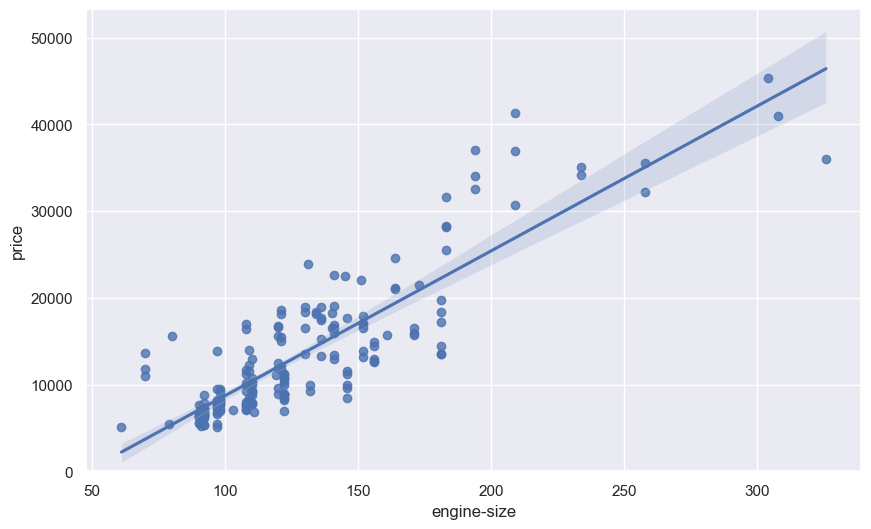

In [52]:
#Régression linéaire simple de 'price' en fonction de 'engine-size' 
slrViz_corr(df['engine-size'])

ainsi de suite pour tout les variable numerique


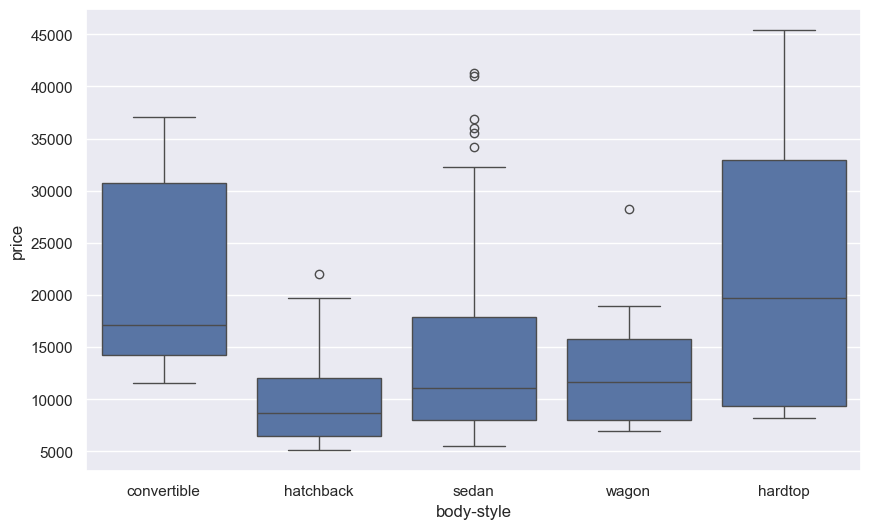

In [50]:
##❖ Variables catégorielles VS variable cible

  ## body-style et price
sns.boxplot(data = df , x= 'body-style', y = 'price')
plt.show()


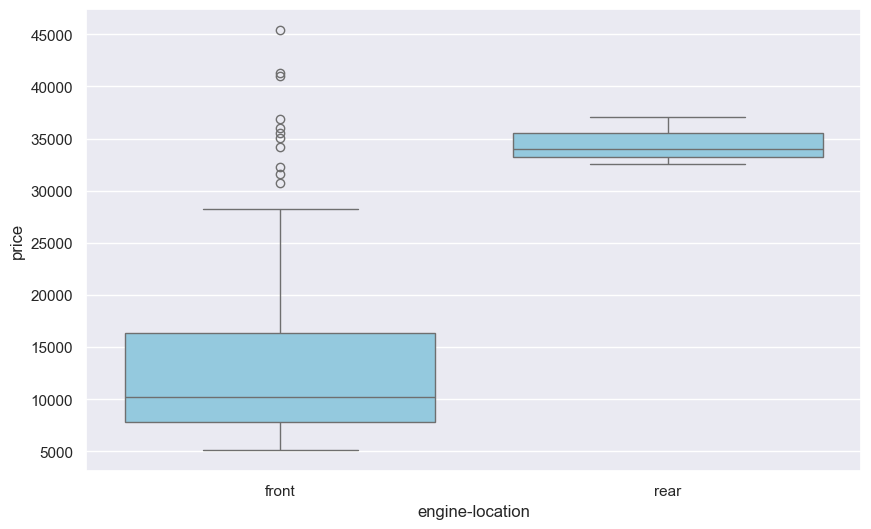

In [43]:
##La variable engine-location représente l'emplacement (avant ou arrière) du moteur. 
sns.boxplot(x = 'engine-location', y = 'price', data = df, color="skyblue") 
plt.show()

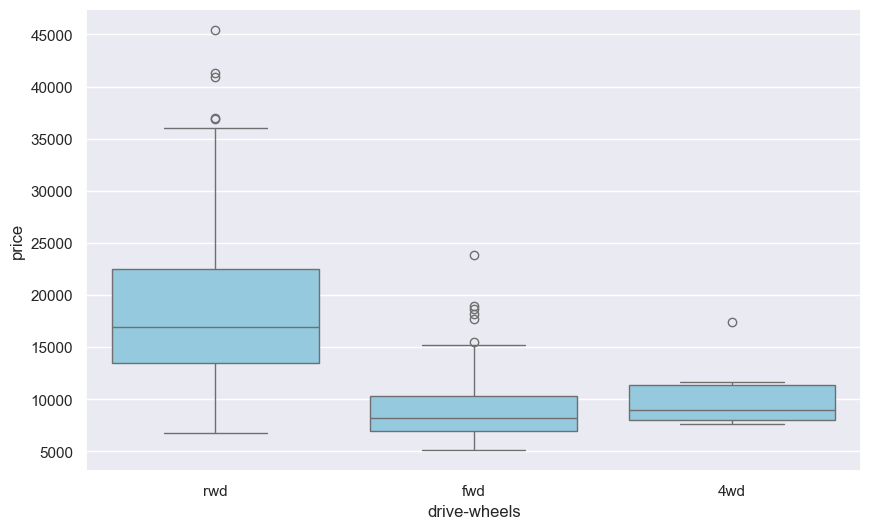

In [44]:
## La variable drive-wheels définit les roues motrices de la voiture.
sns.boxplot(x = 'drive-wheels', y = 'price', data = df, color="skyblue") 
plt.show()

Cette analyse exploratoire des données nous a permis d'avoir une meilleure idée des variables 
qu'il est important de prendre en compte lors de la construction du modèle de prédiction du prix 
d'une voiture. Il s'agit des variables suivantes :  'length', 'width', 'curb-weight', 'engine-size', 'horsepower', 
'city-mpg', 'highway-mpg', 'wheel-base' et 'bore'.

###MODELISATION DU PRIX D'UNE VOITURE ##
##❖ CONSTRUCTION DU MODELE##

In [54]:
#Variables indépendantes
X = df[['wheel_base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower','city-mpg', 'highway-mpg']]
#Variable dépendante 
 
y = df['price']

#Création d'un modèle de régression linéaire
lm = LinearRegression()
## entrenement du model
lm.fit(X,y)
LinearRegression(fit_intercept=True,
    copy_X=True,
    n_jobs=None,
  )
#Coefficients
lm.coef_
np.array([111.78344803,   -72.26084531,   634.95267368,  3.11828375, 
        79.05419995, -1026.27963187,    59.42633928,  -170.06836451, 184.10851533])

#Ordonnée à l'origine
lm.intercept_




-49178.73573315036

In [55]:
#Coefficient de détermination 
 
lm.score(X,y)

0.819067025194617

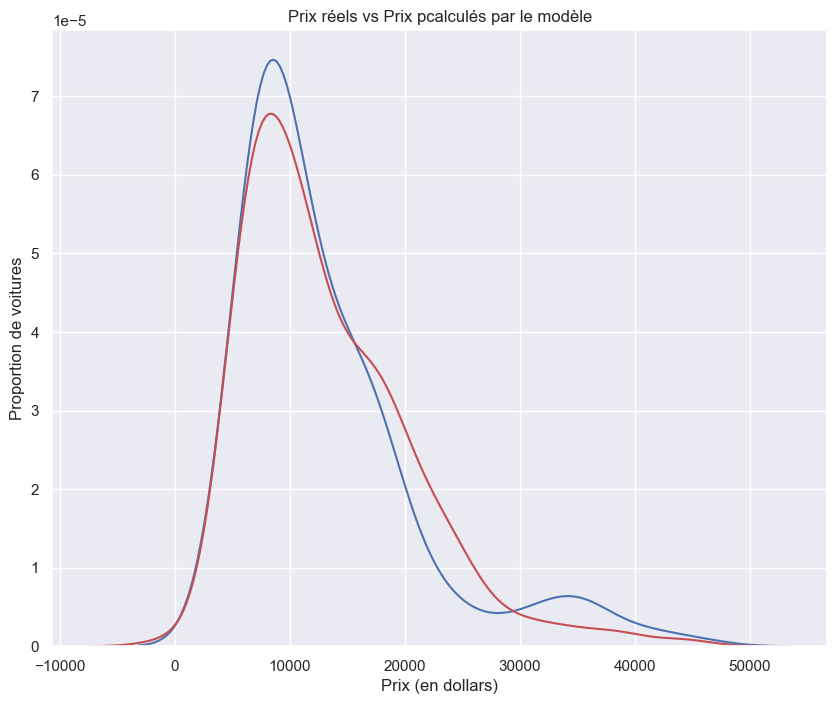

In [60]:
#Prix prédits à partir du modèle 
Y_hat = lm.predict(X)

#Distributions des valeurs ajustées et des valeurs réelles
plt.figure(figsize=(10,8))
ax1 =sns.kdeplot(y,  color="b", label="prix reels")
sns.kdeplot(Y_hat,color="r", label="prix calcules", ax=ax1)
plt.title('Prix réels vs Prix pcalculés par le modèle')
plt.xlabel('Prix (en dollars)')
plt.ylabel('Proportion de voitures')
plt.show()
plt.close()


La métrique d'évaluation par défaut de la performance d'un modèle de régression linéaire est le 
coefficient de détermination. Le coefficient de détermination est égal à 0,82 c'est-à-dire que 
82% de la variation de prix est expliquée par le modèle. Par ailleurs, on remarque que les deux 
courbes sont pratiquement superposées ce qui veut dire que les prix calculés par le modèle sont 
proches des prix réels. Globalement, nous pouvons donc dire que le modèle est de bonne qualité. 
Néanmoins, selon le graphique ci-dessus il y a une zone que le modèle ne couvre pas ce qui 
indique que nous pouvons essayer d’améliorer ce modèle